<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw1prob3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Epoch 1: 90.37%
Epoch 2: 90.91%
Epoch 3: 91.13%
Epoch 4: 91.21000000000001%
Epoch 5: 91.41%
Epoch 6: 91.52%
Epoch 7: 91.53%
Epoch 8: 91.52%
Epoch 9: 91.56%
Epoch 10: 91.55%
Epoch 11: 91.59%
Epoch 12: 91.64%
Epoch 13: 91.67%
Epoch 14: 91.7%
Epoch 15: 91.66%
Epoch 16: 91.69%
Epoch 17: 91.73%
Epoch 18: 91.73%
Epoch 19: 91.74%
Epoch 20: 91.73%
Epoch 21: 91.71000000000001%
Epoch 22: 91.73%
Epoch 23: 91.74%
Epoch 24: 91.71000000000001%
Epoch 25: 91.7%
Epoch 26: 91.72%
Epoch 27: 91.7%
Epoch 28: 91.71000000000001%
Epoch 29: 91.7%
Epoch 30: 91.7%
Epoch 31: 91.71000000000001%
Epoch 32: 91.7%
Epoch 33: 91.74%
Epoch 34: 91.76%
Epoch 35: 91.78%
Epoch 36: 91.76%
Epoch 37: 91.76%
Epoch 38: 91.74%
Epoch 39: 91.75%
Epoch 40: 91.75%
Epoch 41: 91.76%
Epoch 42: 91.75%
Epoch 43: 91.73%
Epoch 44: 91.75%
Epoch 45: 91.72%
Epoch 46: 91.72%
Epoch 47: 91.71000000000001%
Epoch 48: 91.71000000000001%
Epoch 49: 91.71000000000001%
Epoch 50: 91.72%


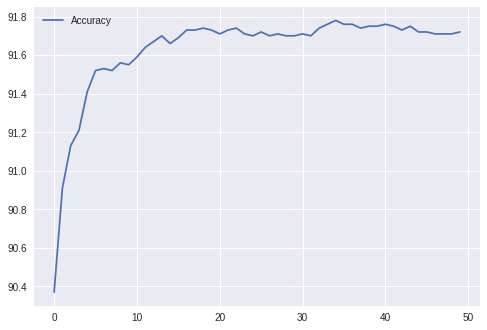

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Reshape the training and testing data of a single dimension by 28*28. 
# Then the values of the reshaped vector are taken as float32 values for the ease of readability.
# Then the values are divided by 255 (max count for colors) so as to make all values withiin 0 to 1.
def reshapeAndReduce(X,i,): return X.reshape(X.shape[0], i).astype('float32')/255

# Convert vector into an Numpy array of one-hot-encodings which are float values
def getOneHot(X,classes_size):
  one_hot_vec = []
  for i in X: one_hot_vec.append([1 if x == i else 0 for x in range(classes_size)])
  return np.array(one_hot_vec).astype('float32')

# Loading mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Setting default variables
rate, batch_size, classes_size, epochs, input_size, final  = 0.005, 100, 10, 50, 28**2, []

# Reshape the training and test data.
X_train, X_test = reshapeAndReduce(X_train, input_size), reshapeAndReduce(X_test, input_size)

# Convert class vector to binary class matrix, for use with categorical_crossentropy.
Y_train, Y_test = getOneHot(y_train, classes_size), getOneHot(y_test, classes_size)

# Generate the initial weights for the neural network: 10 X 784
Weight = np.random.randn(classes_size, input_size) * 0.01

# Generate the initial bases which will be used in the neural nets: 10 X 1
Base = np.random.randn(classes_size, 1)

# For each epoch
for epoch in range(epochs):
  
  # Initialize accuracy to 0
  acc = 0
  
  # Increment each batch at the batch_size from 0 to X_train.shape[0] (60000)
  for inc in range(0, X_train.shape[0], batch_size):
    
    # Set the current batch from the training and testing data
    x, y = X_train[inc:inc+batch_size], Y_train[inc:inc+batch_size]
    
    # Apply the softmax activation function during the forward propogation
    output = np.exp(np.dot(Weight,np.transpose(x))+Base)/(np.sum(np.exp(np.dot(Weight,np.transpose(x))+Base),axis=0,keepdims=True))

    # Apply CCE loss during back propogation to get new Weight matrix
    Weight -= rate*(np.dot((output-np.transpose(y)),x))
    
    # Apply CCE loss during back propogation to get new Base 
    Base -= rate*(np.sum((output - np.transpose(y)), axis = 1, keepdims = True))

  # Run the softmax activation function on the test data
  output = np.transpose(np.exp(np.dot(Weight,np.transpose(X_test))+Base)/(np.sum(np.exp(np.dot(Weight,np.transpose(X_test))+Base),axis=0,keepdims=True)))

  # Iterate through all the test entries
  for test_epoch in range(Y_test.shape[0]): 
  
    # increment acc variable each time a match of the expected and actual outcomes
    if np.argmax(output[test_epoch]) == y_test[test_epoch]: acc += 1
  
  # Print accuracy for each output
  print('Epoch {}: {}%'.format(epoch+1, acc*0.01))
  
  # Add scores to final list for plotting
  final.append(acc*0.01)

  # Plot the accuracy based on teh final list entries
plt.plot(final,label='Accuracy'); plt.legend()

